# Data Analysis with Python - Correlation in Movies Data

The dataset can be found in "https://www.kaggle.com/danielgrijalvas/movies".

-- import libraries --

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

-- import dataset --

In [19]:
df = pd.read_csv('D:\Downloads\movies.csv')

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


-- Data Cleaning --

In [22]:
# Check for missing values
df.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [23]:
# Drop missing values
df.dropna(inplace=True)

In [24]:
# Convert float types to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [25]:
# Get movie release year from released date
df['release_date'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [26]:
# Drop old released column
df = df.drop(['released'], axis=1)

In [27]:
# Drop any existing duplicates
df = df.drop_duplicates()

In [28]:
# Sort the data according to highest gross income
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

-- Prediction: High budget movies should earn more --
-- Does budget highly correlated with gross ? --

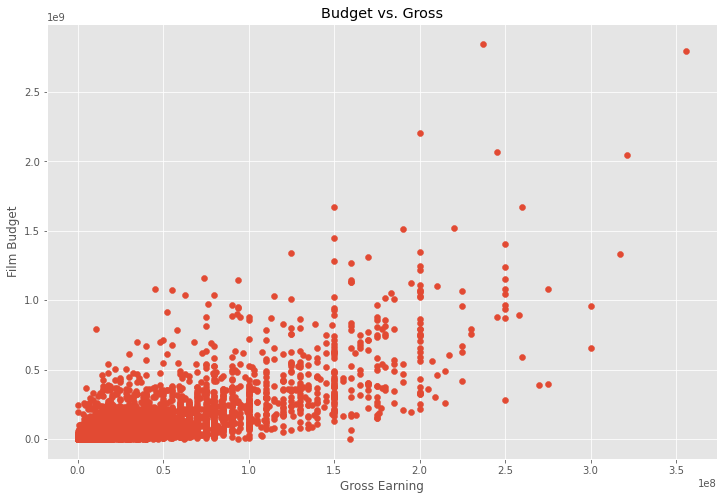

In [29]:
# budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross')
plt.xlabel('Gross Earning')
plt.ylabel('Film Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

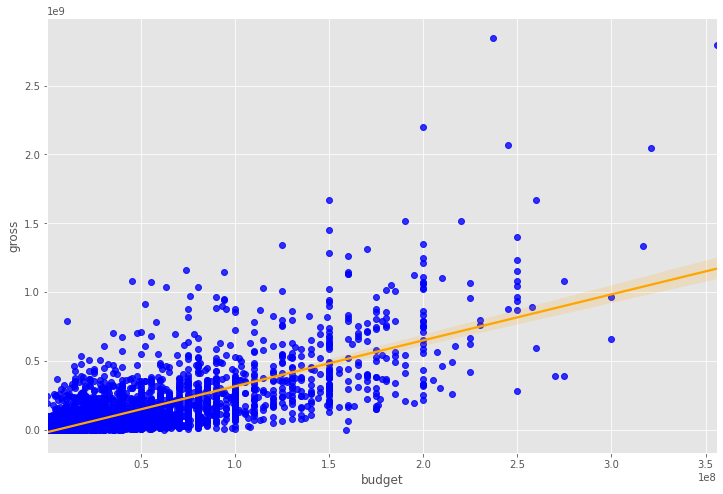

In [30]:
# Regression plot using seaborn budget vs gross
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "orange"})

-- Question: Do high budget movies get higher scores? --

<AxesSubplot:xlabel='budget', ylabel='score'>

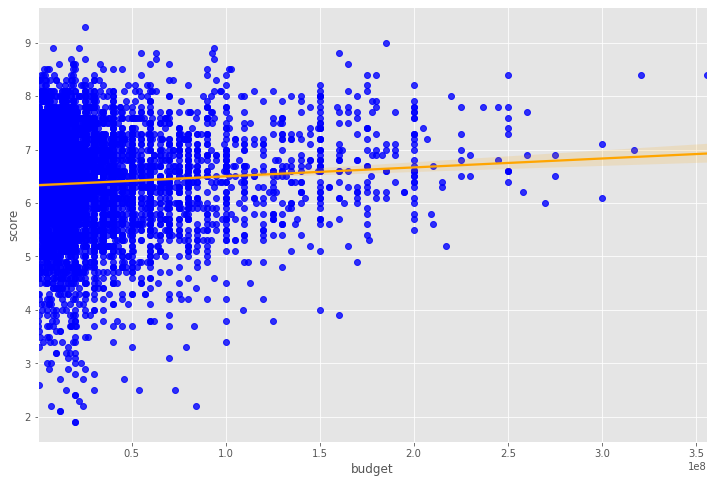

In [31]:
# Regression plot using seaborn budget vs score
sns.regplot(x = 'budget', y = 'score', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "orange"})

-- Question: Do movies earn more when voted more? --

<AxesSubplot:xlabel='gross', ylabel='votes'>

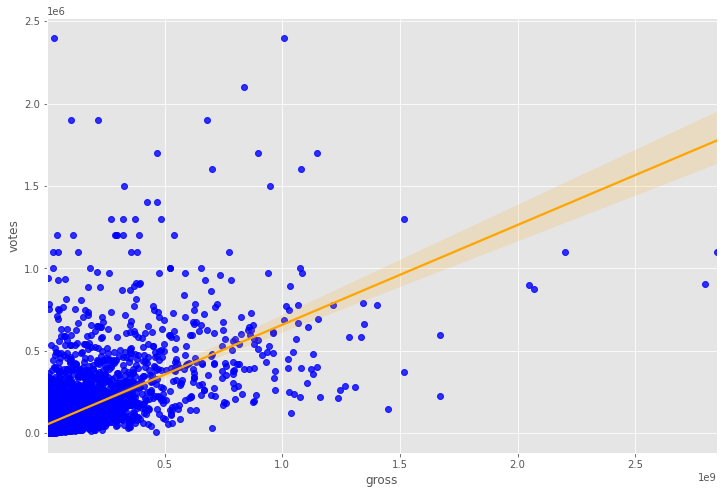

In [32]:
# Regression plot using seaborn gross vs votes
sns.regplot(x = 'gross', y = 'votes', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "orange"})

-- Investigating all correlations --

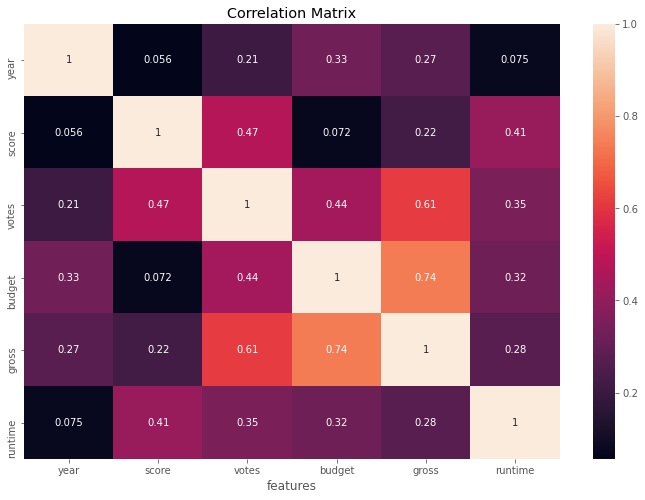

In [33]:
# Create heatmap using seaborn
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('features')
plt.xlabel('features')
plt.show()